<a href="https://colab.research.google.com/github/almost232/summer-school/blob/main/Lab_1_Part_B_Scaffold_(demo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| | |
|:---:|:---|
| <img src="https://drive.google.com/uc?export=view&id=1OaJVnbVa6RHE5tEl1e94s2B3L8BsO31K" width="100"/> |  <h1><b>Introduction to Language Models: Preprocessing, Modelling, and NLP</b>🙊</h1>|

---

**Instructor:**  
Pavlos Protopapas  

**Teaching Team:**  
Nawang Thinley Bhutia

# Introduction to Language Models: Preprocessing, Modelling, and NLP

While part A familirised you with NLP tasks, such as tokenization, cleaning, and normalization, in this notebook, we will touch upon **modelling**.



![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*BgalYghgF7tejjzW.png)

| <div align="right">[Image Source](https://blog.stackademic.com/unlocking-the-power-of-nlp-a-deep-dive-into-text-preprocessing-steps-8eb5dfe8b94)</div> |



## Table of Contents

### **Part A**
1. Preprocessing Techniques
    - Loading your Data
    - Data Cleaning
    - Tokenization
    - Normalization
2. Simple Sentiment Analysis
    - Counting vs Context

3. Unigrams and Bigrams

    - DEMO: Calculate the frequency of unigrams and bigrams in a sample review.

### **Part B**
4. Embeddings
    - What are Embeddings?
    - Plotting Embeddings
    - Similar Words


  
5. Neural Networks for Language Modeling

    - Simple Neural Network Model: Using TensorFlow, create and train a model on the simple text to predict the sentiment.

    -Exercise: modify or optimize the model parameters to see the difference.


You may recall from section 2, that the words _bad_, _awful_ and _mediocre_ were in the last review but they were being used to compare it to another title.


### ⏸ We realised that context was important, How can we move towards capturing both the context and the sematic meaning of words?

## 3. Embeddings

In [1]:
# Install necessary libraries
# if the imports below fail try this cell first
!pip install gensim matplotlib scikit-learn

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
import gensim.downloader as api

In [3]:
# Load pre-trained Word2Vec model (Google News vectors) using gensim downloader
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


We are using a pre trained model here called "Word-2-vec"

- model/LLM needs numbers
- can't understand text
- **how can we convert words to numbers?**


In [4]:
# @title While we wait for the model to download let's discuss: What are embeddings?
# @markdown A few slides to explore this:
from IPython.display import IFrame
# Google Drive file ID
file_id = '1-V0KFDnSuDeAk8OTSr7D8EBVEfOWOETq'
#https://drive.google.com/file/d/1-V0KFDnSuDeAk8OTSr7D8EBVEfOWOETq/view?usp=drive_link
# Google Drive URL
drive_url = f"https://drive.google.com/file/d/{file_id}/preview"

# Display the PDF
IFrame(drive_url, width=800, height=600)


In [5]:
# Words of interest - you can choose words that are relevant to your IMDB reviews or general high-interest words
words_of_interest = ['happy', 'joyful', 'sad', 'miserable', 'film', 'movie', 'cinema', 'theater', 'actor', 'actress'] #write your own and test it out!

# Extracting the vectors for the selected words
word_vectors = np.array([model[word] for word in words_of_interest if word in model])

# Using t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0,perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

### Plotting Embeddings

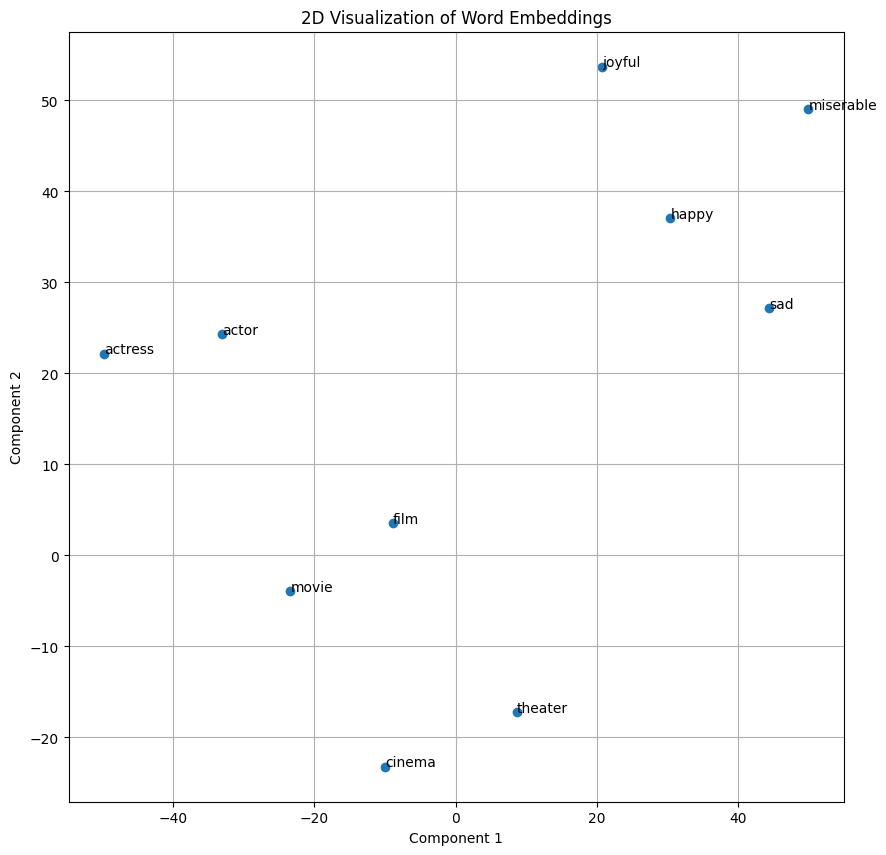

In [6]:
# Plotting the results
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(words_of_interest):
    if word in model:
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.title('2D Visualization of Word Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

### Similar words

In [7]:
# Example: Get the vector for the word "king"
king_vector = model['king']

# Find most similar words to "king"
similar_words = model.most_similar('king')
print(similar_words)

[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


In [8]:
#test your own example!


## Neural Networks for Language Modelling

Exercise: Modify/Optimize Model Parameters
Prompt students to experiment with model parameters:

Change the LSTM layer size or add more LSTM layers.
Adjust the Embedding output dimensions.
Try different optimizers and loss functions.

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [10]:
# some simple sample data
sentences = [
    "This movie was excellent",
    "The plot was very boring",
    "I loved the cinematography",
    "The pacing was terrible",
    "It's an instant classic",
    "Poorly written script"
]

# target variable
labels = [1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative

### Some preprocessing

In [11]:
# Tokenizing the text
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post')

In [12]:
import numpy as np

In [13]:
# Convert labels to a NumPy array
labels = np.array(labels) # Convert list to numpy array

### Creating our model

In [14]:
# Model architecture
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=padded_sequences.shape[1]),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training our model

In [15]:
# Training the model
model.fit(padded_sequences, labels, epochs=10)

# Visualize the training process
import matplotlib.pyplot as plt

history = model.fit(padded_sequences, labels, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 0.6912
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step - accuracy: 0.8333 - loss: 0.6904
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.6895
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.6910
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6667 - loss: 0.6903
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.6878
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.6910
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6667 - loss: 0.6901
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6667 - loss: 0.6889
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6667 - loss: 0.6879
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.7500 - loss: 0.6888 - val_accuracy: 1.0000 - val_loss: 0.6822
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/

### Predicting and plotting

In [16]:
import pandas as pd

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
                     Sentence  Actual Label  Predicted Label
0    This movie was excellent             1                1
1    The plot was very boring             0                0
2  I loved the cinematography             1                1
3     The pacing was terrible             0                0
4     It's an instant classic             1                1
5       Poorly written script             0                0


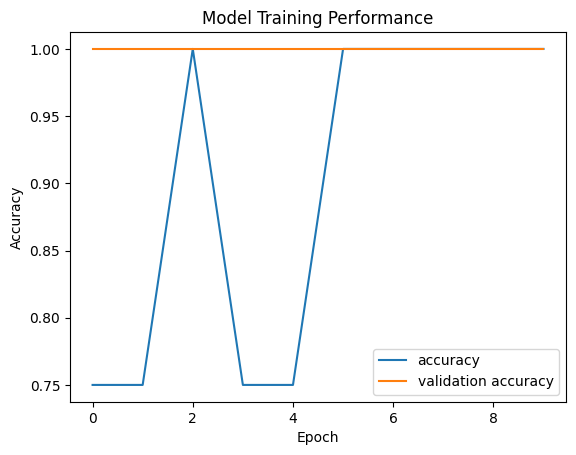

In [17]:
# Make predictions
predictions = model.predict(padded_sequences)
# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int)

# Create a DataFrame for a pretty display
results_df = pd.DataFrame({
    'Sentence': sentences,
    'Actual Label': labels,
    'Predicted Label': predicted_labels.flatten()  # Flatten to convert from 2D to 1D
})

print(results_df)

# Visualize the training process
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
#test your own sentences!